# House Pricing

### Cargar librerias o paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin

### Cargar los datos a procesar

In [2]:
class ReadFromCSVFiles(object):
    def __init__(self, train_csv_path, test_csv_path):
        self.train_data = pd.read_csv(train_csv_path)
        self.test_data = pd.read_csv(test_csv_path)

    def __call__(self, y_col_name):
        x_train = self.train_data.drop(y_col_name, axis='columns')
        y_train = self.train_data[[y_col_name]]
        x_test = self.test_data
        return x_train, y_train, x_test

In [3]:
csv_data = ReadFromCSVFiles('train.csv', 'test.csv')

In [4]:
# print(csv_data('SalePrice')[0].head())
print(csv_data.train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
print(csv_data.test_data.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

De lo observado podemos ver que no todos los datos son numericos y el dato que buscamos tiene de nombre "Saleprice".

Ahora como vimos en el head, existe una gran cantidad de datos NaN que posiblemente son datos perdidos, veremos su distribucion entre las variables

In [6]:
missing_data = len(csv_data.train_data) - csv_data.train_data.count()

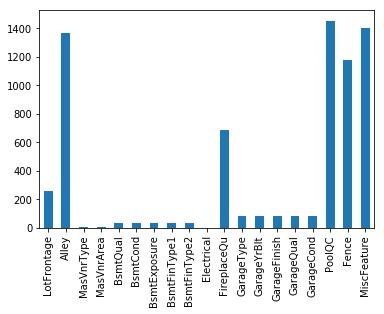

In [7]:
missing_data[missing_data>0].plot.bar()

In [8]:
for key in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']:
    csv_data.test_data[key] = csv_data.test_data[key].fillna('None')

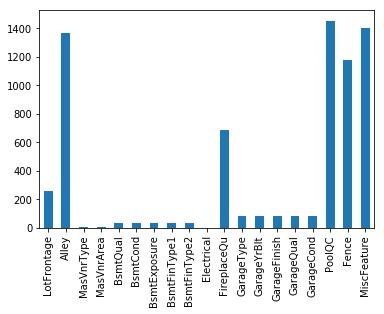

In [9]:
missing_data2 = len(csv_data.train_data) - csv_data.train_data.count()
missing_data2[missing_data2>0].plot.bar()

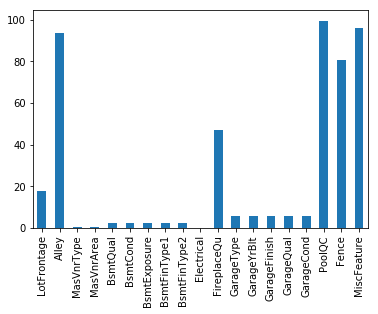

In [10]:
missing_data2_perc = (len(csv_data.train_data) - csv_data.train_data.count())*100/len(csv_data.train_data)
missing_data2_perc[missing_data2_perc>0].plot.bar()

In [11]:
csv_data.train_data.drop(columns=['Alley', 'PoolQC','Fence','MiscFeature','FireplaceQu'])
csv_data.test_data.drop(columns=['Alley', 'PoolQC','Fence','MiscFeature','FireplaceQu'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,...,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,...,21,0,0,0,0,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,...,75,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,4,2010,WD,Normal


In [12]:
class DataFrameImputer(TransformerMixin):

    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
csv_data.train_data = DataFrameImputer().fit_transform(csv_data.train_data)
csv_data.test_data = DataFrameImputer().fit_transform(csv_data.test_data)

In [13]:
missing_datatr = len(csv_data.train_data) - csv_data.train_data.count()
m_natr = missing_datatr[missing_datatr>0]
print(m_natr)
missing_datate = len(csv_data.test_data) - csv_data.test_data.count()
m_nate = missing_datate[missing_datatr>0]
print(m_nate)

Series([], dtype: int64)
Series([], dtype: int64)


Ya no tenemos datos perdidos en train data y test data

In [14]:
train_objs_num = len(csv_data.train_data)
csv_data.test_data['SalePrice']=-1
dataset = pd.concat(objs=[csv_data.train_data, csv_data.test_data], axis=0)
dataset_preprocessed = pd.get_dummies(dataset)
csv_data.train_data = dataset_preprocessed[dataset_preprocessed['SalePrice']>=0]
csv_data.test_data = dataset_preprocessed[dataset_preprocessed['SalePrice']<0].drop(columns=['SalePrice'])

In [15]:
class LinearRegression(object):
    def __init__(self, data, y_column_name):
        self.x_train, self.y_train, self.x_test = data(y_column_name)
        self.x_train = self.x_train.iloc[:, :]
        self.y_train = self.y_train.iloc[:, 0:1].values
        self.x_test = self.x_test.iloc[:, :]
        self.y_col = y_column_name
        self.n_train = len(self.y_train)
        self.n_test = len(self.x_test)
        self.n_features = self.x_train.shape[1]
        print(self.y_train)

    def normalize(self):
        x_media = np.concatenate((self.x_train, self.x_test), axis=0).mean(axis=0)
        x_std = np.concatenate((self.x_train, self.x_test), axis=0).std(axis=0)
        y_media = np.concatenate((self.y_train), axis=0).mean()
        y_std = np.concatenate((self.y_train), axis=0).std()

        self.x_train = (self.x_train - x_media) / x_std
        self.y_train = (self.y_train - y_media) / y_std
        # self.x_test = (self.x_test - x_media) / x_std

    def add_ones_row(self):
        self.x_train = np.concatenate((np.ones([self.n_train, 1]), self.x_train), axis=1)
        self.x_test = np.concatenate((np.ones([self.n_test, 1]), self.x_test), axis=1)
        self.n_features = self.x_train.shape[1]

    def train(self, alpha=None, theta=None, iterations=None):
        alpha = 0.01 if alpha is None else alpha
        theta = np.zeros([1, self.n_features]) if theta is None else theta
        iterations = 2000 if iterations is None else iterations

        def hypothesis(_theta, _x_train):
            return _x_train @ _theta.T

        def cost_function(_theta, _n_train, _x_train, _y_train):
            return np.sum((hypothesis(_theta, _x_train) - _y_train) ** 2) / (2 * len(_x_train))

        def gradient_descent(_theta, _n_train, _iterations, _alpha, _x_train, _y_train):
            costs = []
            for i in range(_iterations):
                _theta = _theta - _alpha * np.sum(_x_train * (hypothesis(_theta, _x_train) - _y_train),
                                                  axis=0) / _n_train
                costs.append(cost_function(_theta, _n_train, _x_train, _y_train))
            return _theta, costs

        final_theta, costs = gradient_descent(theta, self.n_train, iterations, alpha, self.x_train, self.y_train)
        return final_theta, costs

    def predict(self, _theta, data):
        return np.dot(data, _theta)
    
    def graphical_representation(self, ftheta, costs):

        rcParams['figure.figsize'] = 5, 10

        plt.subplot(2, 1, 1)
        plt.plot(np.arange(len(costs)), costs, 'r')
        plt.xlabel('Iteración')
        plt.ylabel('Costo')
        plt.title(
            'Costo por iteración')

        if self.n_features == 2:
            plt.subplot(2, 1, 2)
            plt.scatter(self.x_train[:, 1], self.y_train, s=10)
            linea = np.arange(np.min(self.x_train[:, 1] - 1), np.max(self.x_train[:, 1] + 1))
            linea = np.column_stack((np.ones(linea.shape[0]), linea))
            plt.plot(linea[:, 1], self.predict(ftheta[0], linea), c="green")
            plt.xlabel('X_1')
            plt.ylabel('y')
            cadena = "Recta: y = X_1 * " + str(round(ftheta[0][1], 2)) + " +  " + str(round(ftheta[0][0], 2))
            plt.text(0.5, 0.5, cadena, horizontalalignment='left', verticalalignment='center', )

        plt.show()

In [16]:
lr = LinearRegression(csv_data, 'SalePrice')
lr.normalize()
lr.add_ones_row()
theta, cost = lr.train()

[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]


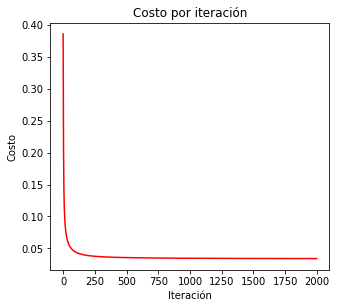

In [17]:
lr.graphical_representation(theta, cost)

In [18]:
ans = np.dot(theta, np.transpose(lr.x_test))

In [19]:
print(ans)

[[1446.09270049 1956.14359938 1854.56431197 ... 2235.75436301
  1355.89559157 1698.37468767]]


In [20]:
with open('submit.csv', 'w') as filec:
    filec.write('Id,SalePrice\n')
    for i,j in enumerate(ans[0]):
        filec.write(str(i+1461)+','+str(j)+'\n')